In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import IPython
import pandas as pd
import tensorflow as tf

import influence.experiments as experiments
from influence.all_CNN_1d import All_CNN_1d

/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
import influence.dataset as dataset
from influence.dataset import DataSet
from tensorflow.contrib.learn.python.learn.datasets import base

In [3]:
np.random.seed(42)

In [4]:
#### creating the dataset which is consistent with the dataset modul 


train_set=pd.read_csv('data_vent/train_set.csv')
val_set=pd.read_csv('data_vent/val_set.csv')
test_set=pd.read_csv('data_vent/test_set.csv')

In [5]:
trainy=pd.read_csv('data_vent/trainy.csv')
valy=pd.read_csv('data_vent/valy.csv')
testy=pd.read_csv('data_vent/testy.csv')

In [6]:
df = pd.read_csv('data_vent/orginal_data.csv')

In [7]:
# make the range between 0 and 1
column = list(train_set.columns.values)
for col in column:
    minimum = df[col].min()
    maximum = df[col].max()
    train_set[col] = (train_set[col] - minimum)/(maximum-minimum)
    val_set[col] = (val_set[col] - minimum)/(maximum-minimum)
    test_set[col] = (test_set[col] - minimum)/(maximum-minimum)

In [8]:
train_set = train_set.iloc[104:]

In [9]:
trainy = trainy.iloc[104:]

In [10]:
train_set.shape

(175872, 25)

In [11]:
train_set.head()

,Admittype,Ethnicity,Gender,Age,Admission Weight (Kg),Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Inspired O2 Fraction,PEEP set,...,Peak Insp. Pressure,O2 Flow,Plateau Pressure,Arterial O2 pressure,Arterial CO2 Pressure,Arterial Blood Pressure systolic,Arterial Blood Pressure diastolic,Arterial Blood Pressure mean,SBT_value,ventilator_category
104,1.0,0.0,0.0,0.165179,0.567901,0.333333,0.142857,0.96,0.35,0.333333,...,0.322581,0.48,0.375,0.178218,0.895522,0.382353,0.378505,0.258721,0.5,0.272727
105,1.0,0.0,0.0,0.165179,0.567901,0.264151,0.214286,0.98,0.35,0.333333,...,0.322581,0.48,0.375,0.178218,0.895522,0.382353,0.378505,0.258721,0.5,0.272727
106,1.0,0.0,0.0,0.165179,0.567901,0.251572,0.171429,0.96,0.36,0.333333,...,0.322581,0.48,0.375,0.178218,0.895522,0.382353,0.378505,0.258721,0.5,0.272727
107,1.0,0.0,0.0,0.165179,0.567901,0.283019,0.178571,0.96,0.36,0.333333,...,0.322581,0.48,0.375,0.178218,0.895522,0.382353,0.378505,0.258721,0.5,0.272727
108,1.0,0.0,0.0,0.165179,0.567901,0.270440,0.221429,0.96,0.36,0.333333,...,0.322581,0.48,0.375,0.178218,0.895522,0.382353,0.378505,0.258721,0.5,0.272727


In [12]:
train_set = train_set.values
val_set = val_set.values
test_set = test_set.values

In [13]:
trainy = trainy.values
valy = valy.values
testy = testy.values

In [14]:
train_set.shape

(175872, 25)

In [15]:
trainy = np.reshape(trainy, (trainy.shape[0],))
valy = np.reshape(valy, (valy.shape[0],))
testy = np.reshape(testy, (testy.shape[0],))

In [16]:
trainy.shape, valy.shape, testy.shape

((175872,), (24531,), (19584,))

In [17]:
df.shape

(220091, 31)

In [18]:
train = DataSet(train_set, trainy)
validation = DataSet(val_set, valy)
test = DataSet(test_set, testy)
data_sets = base.Datasets(train=train, validation=validation, test=test)

In [19]:
######## start to train model#######

In [20]:
# for one epoch = 175872/128 = 1374
# how many epoch = num_steps:100000/1374 = 72.8

In [21]:
num_classes = 2
input_side = 25
input_channels = 1
input_dim = input_side * input_channels 
#weight_decay = 0.0005
batch_size = 128

initial_learning_rate = 0.00001 
decay_epochs = [40, 50000]
hidden1_units = 64
hidden2_units = 128
hidden3_units = 256
conv_patch_size = 1
num_steps = 100000

In [22]:
model = All_CNN_1d(
    input_side=input_side, 
    input_channels=input_channels,
    conv_patch_size=conv_patch_size,
    hidden1_units=hidden1_units, 
    hidden2_units=hidden2_units,
    hidden3_units=hidden3_units,

    num_classes=num_classes, 
    batch_size=batch_size,
    data_sets=data_sets,
    initial_learning_rate=initial_learning_rate,
    damping=1e-2,
    decay_epochs=decay_epochs,
    mini_batch=True,
    train_dir='output', 
    log_dir='log',
    model_name='ventilator_all_cnn_1d')






Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Total number of parameters: 926850
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
model.train(
    num_steps=num_steps, 
    iter_to_switch_to_batch=10000000,
    iter_to_switch_to_sgd=10000000)

Training for 100000 steps
Step 0: loss = 3.26805592 (0.219 sec)
Step 1000: loss = 2.45721483 (0.030 sec)
Step 2000: loss = 2.32443023 (0.038 sec)
Step 3000: loss = 2.04763603 (0.037 sec)
Step 4000: loss = 1.65839386 (0.039 sec)
Step 5000: loss = 1.35447466 (0.039 sec)
Step 6000: loss = 1.09986842 (0.034 sec)
Step 7000: loss = 1.06704843 (0.026 sec)
Step 8000: loss = 0.94598138 (0.049 sec)
Step 9000: loss = 0.92270029 (0.043 sec)
Step 10000: loss = 0.76730639 (0.040 sec)
Step 11000: loss = 0.82836008 (0.043 sec)
Step 12000: loss = 0.72611588 (0.052 sec)
Step 13000: loss = 0.71686316 (0.040 sec)
Step 14000: loss = 0.64804137 (0.053 sec)
Step 15000: loss = 0.63991535 (0.040 sec)
Step 16000: loss = 0.61866343 (0.048 sec)
Step 17000: loss = 0.52598321 (0.035 sec)
Step 18000: loss = 0.48369598 (0.034 sec)
Step 19000: loss = 0.47198778 (0.034 sec)
Step 20000: loss = 0.50892937 (0.036 sec)
Step 21000: loss = 0.50612533 (0.052 sec)
Step 22000: loss = 0.50967830 (0.034 sec)
Step 23000: loss = 0.

In [ ]:
######### add extubation failure patients back to the training dataset #########

In [26]:
df_exfailure = pd.read_csv('data_withextubation_failure/exfailure_data.csv')

In [27]:
df_exfailure.shape

(78611, 31)

In [28]:
df_exfailure = df_exfailure.drop_duplicates(ignore_index=True)

In [29]:
df_exfailure.shape

(78592, 31)

In [30]:
corhort_exfailure = df_exfailure['hadm'].unique()

In [31]:
corhort_exfailure.shape

(249,)

In [32]:
corhort_exfailure_train = corhort_exfailure[:200]
corhort_exfailure_test = corhort_exfailure[200:]

In [33]:
len(corhort_exfailure_train), len(corhort_exfailure_test)

(200, 49)

In [34]:
train_exfailure = pd.DataFrame()
train_exfailure= df_exfailure.loc[df_exfailure['hadm'].isin(corhort_exfailure_train)]

In [35]:
test_exfailure = pd.DataFrame()
test_exfailure= df_exfailure.loc[df_exfailure['hadm'].isin(corhort_exfailure_test)]

In [36]:
train_exfailure.shape

(62412, 31)

In [37]:
train_exfailure = train_exfailure[:62336]

In [38]:
train_exfailure.shape

(62336, 31)

In [39]:
train_exfailure = train_exfailure.drop(['timestamp', 'hadm', 'Admdays', 'Ventilator Mode', 'Vented'], axis=1)
test_exfailure = test_exfailure.drop(['timestamp', 'hadm', 'Admdays', 'Ventilator Mode', 'Vented'], axis=1)

In [40]:
trainy_exfailure = train_exfailure['Vented_1']
testy_exfailure = test_exfailure['Vented_1']

In [41]:
train_exfailure = train_exfailure.drop(['Vented_1'], axis=1)
test_exfailure = test_exfailure.drop(['Vented_1'], axis=1)

In [42]:
train_exfailure.shape

(62336, 25)

In [43]:
# make the range of features between 0 and 1
column = list(train_exfailure.columns.values)
for col in column:
    minimum = df[col].min()
    maximum = df[col].max()
    train_exfailure[col] = (train_exfailure[col] - minimum)/(maximum-minimum)
    test_exfailure[col] = (test_exfailure[col] - minimum)/(maximum-minimum)

In [44]:
train_exfailure = train_exfailure.values
test_exfailure = test_exfailure.values

In [45]:
train_set.shape

(175872, 25)

In [46]:
modified_train = np.concatenate((train_set,train_exfailure),axis=0)

In [47]:
modified_train.shape

(238208, 25)

In [48]:
trainy_exfailure= trainy_exfailure.values
testy_exfailure = testy_exfailure.values

In [49]:
trainy.shape

(175872,)

In [50]:
modified_trainy = np.concatenate((trainy,trainy_exfailure),axis=0)

In [51]:
modified_trainy.shape

(238208,)

In [52]:
train_modified = DataSet(modified_train, modified_trainy)
validation = DataSet(val_set, valy)
test = DataSet(test_set, testy)
modified_data_sets = base.Datasets(train=train_modified, validation=validation, test=test)

In [53]:
# Train a model on the modified training set
tf.reset_default_graph()

modified_model = All_CNN_1d(
    input_side=input_side, 
    input_channels=input_channels,
    conv_patch_size=conv_patch_size,
    hidden1_units=hidden1_units, 
    hidden2_units=hidden2_units,
    hidden3_units=hidden3_units,

    num_classes=num_classes, 
    batch_size=batch_size,
    data_sets=modified_data_sets,
    initial_learning_rate=initial_learning_rate,

    decay_epochs=decay_epochs,
    mini_batch=True,
    train_dir='output', 
    log_dir='log',
    model_name='ventilator_all_cnn_1d')

Total number of parameters: 926850


In [54]:
modified_model.train(
    num_steps=100000, 
    iter_to_switch_to_batch=10000000,
    iter_to_switch_to_sgd=10000000)

Training for 100000 steps
Step 0: loss = 3.26805592 (0.301 sec)
Step 1000: loss = 2.45721483 (0.038 sec)
Step 2000: loss = 2.30711627 (0.052 sec)
Step 3000: loss = 1.96709383 (0.042 sec)
Step 4000: loss = 1.59284222 (0.073 sec)
Step 5000: loss = 1.32766831 (0.042 sec)
Step 6000: loss = 1.18162727 (0.045 sec)
Step 7000: loss = 1.09312868 (0.057 sec)
Step 8000: loss = 0.97583747 (0.049 sec)
Step 9000: loss = 0.90702355 (0.049 sec)
Step 10000: loss = 0.92665422 (0.050 sec)
Step 11000: loss = 0.77505219 (0.040 sec)
Step 12000: loss = 0.73768038 (0.048 sec)
Step 13000: loss = 0.66516864 (0.056 sec)
Step 14000: loss = 0.67886358 (0.031 sec)
Step 15000: loss = 0.64984441 (0.040 sec)
Step 16000: loss = 0.61172152 (0.035 sec)
Step 17000: loss = 0.48834181 (0.037 sec)
Step 18000: loss = 0.54849076 (0.050 sec)
Step 19000: loss = 0.65715349 (0.037 sec)
Step 20000: loss = 0.58777529 (0.036 sec)
Step 21000: loss = 0.43904394 (0.052 sec)
Step 22000: loss = 0.50492597 (0.069 sec)
Step 23000: loss = 0.

In [55]:
from sklearn.metrics import classification_report

y_pred_test = modified_model.sess.run(
    modified_model.preds,
    feed_dict=modified_model.all_test_feed_dict)

target_names = ['class 0', 'class 1']
y_pred_test = np.argmax(y_pred_test, axis=1)

In [56]:
print(classification_report(testy, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.63      0.72      5051
     class 1       0.88      0.96      0.92     14533

    accuracy                           0.87     19584
   macro avg       0.86      0.79      0.82     19584
weighted avg       0.87      0.87      0.87     19584



In [57]:
from sklearn.metrics import classification_report

y_pred_test = model.sess.run(
    model.preds,
    feed_dict=model.all_test_feed_dict)

target_names = ['class 0', 'class 1']
y_pred_test = np.argmax(y_pred_test, axis=1)

In [58]:
print(classification_report(testy, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.67      0.73      5051
     class 1       0.89      0.94      0.92     14533

    accuracy                           0.87     19584
   macro avg       0.85      0.81      0.82     19584
weighted avg       0.87      0.87      0.87     19584



In [59]:
orig_model_preds = model.sess.run(
    model.preds,
    feed_dict=model.all_test_feed_dict)

In [61]:
orig_model_preds.shape

(19584, 2)

In [62]:
orig_model_preds = np.argmax(orig_model_preds, axis=1)

In [63]:
modified_model_preds = modified_model.sess.run(
    modified_model.preds,
    feed_dict=modified_model.all_test_feed_dict)

In [64]:
modified_model_preds.shape

(19584, 2)

In [65]:
modified_model_preds = np.argmax(modified_model_preds, axis=1)

In [66]:
different_modified = []
for i in range(len(testy)):
    if modified_model_preds[i] != orig_model_preds[i]:
        different_modified.append(i)

In [67]:
predic_orig = orig_model_preds[different_modified]

In [68]:
true_label = testy[different_modified]

In [69]:
mtest_id = []
for i in range(len(true_label)):
    if predic_orig[i] == true_label[i]:
        mtest_id.append(i)

In [71]:
result = true_label[mtest_id]

In [100]:
true_label[8]

1.0

In [101]:
different_modified[8]

114

In [105]:
test_idx = 114
influences_modified = modified_model.get_influence_on_test_loss(
    test_indices=[test_idx], 
    train_idx=np.arange(len(modified_model.data_sets.train.labels)),
    force_refresh=True)

Norm of test gradient: 20.094368
Function value: -95.76898956298828
Split function value: 27.644641876220703, -123.4381
Predicted loss diff on train_idx 5: -1.97940507542376e-05
Function value: -12951.529296875
Split function value: 9028.6220703125, -24021.26
Predicted loss diff on train_idx 5: 0.0007471361831591246
Function value: -129755.263671875
Split function value: -121568.5625, -24017.256
Predicted loss diff on train_idx 5: 0.002094636355466192
Function value: -410037.37890625
Split function value: -368938.28125, -23919.535
Predicted loss diff on train_idx 5: 0.001610588988970839
Function value: -859708.61328125
Split function value: -839598.8125, -24925.113
Predicted loss diff on train_idx 5: 0.007671149170315438
Function value: -1584763.396484375
Split function value: -1476788.875, -23644.521
Predicted loss diff on train_idx 5: 0.002619830464112509
Function value: -2947536.501953125
Split function value: -2846555.25, -26928.002
Predicted loss diff on train_idx 5: 0.01428129389

In [82]:
tf.get_default_graph()

In [194]:
top_k =15
helpful_points = np.argsort(influences_modified)[-top_k:][::-1]
unhelpful_points = np.argsort(influences_modified)[:top_k]

In [195]:
influences_to_plot = []
points_to_plot = []

for points, message in [
    (unhelpful_points, 'worse'), (helpful_points, 'better')]:
    print("Top %s training points making the loss on the test point %s:" % (top_k, message))
    for counter, idx in enumerate(points):
        print("#%5d, class=%s, predicted_loss_diff=%.8f" % (
            idx,                 
            modified_trainy[idx], 
            influences_modified[idx]))
        
        points_to_plot.append(idx)
        influences_to_plot.append(influences_modified[idx])

Top 15 training points making the loss on the test point worse:
#77475, class=1.0, predicted_loss_diff=-0.16406575
#53233, class=1.0, predicted_loss_diff=-0.15410436
#53231, class=1.0, predicted_loss_diff=-0.15023694
#186003, class=0.0, predicted_loss_diff=-0.14771105
#15304, class=0.0, predicted_loss_diff=-0.14306511
#26556, class=0.0, predicted_loss_diff=-0.13984615
#15307, class=0.0, predicted_loss_diff=-0.13969990
#53229, class=1.0, predicted_loss_diff=-0.13683761
#60841, class=1.0, predicted_loss_diff=-0.13551770
#15301, class=0.0, predicted_loss_diff=-0.13382185
#15320, class=0.0, predicted_loss_diff=-0.13143367
#186004, class=0.0, predicted_loss_diff=-0.12964110
#53235, class=1.0, predicted_loss_diff=-0.12931203
#15306, class=0.0, predicted_loss_diff=-0.12724073
#185745, class=1.0, predicted_loss_diff=-0.12654783
Top 15 training points making the loss on the test point better:
#13744, class=0.0, predicted_loss_diff=0.14803877
#13742, class=0.0, predicted_loss_diff=0.14535237
#13

In [200]:
patient = []
for i in range(len(points_to_plot)):
    if points_to_plot[i] >= 175872:
        patient.append('extubation failiure patient')
    else:
        patient.append('normal patient')

In [227]:
indication = []
for i in range(len(points_to_plot)):
    val = i +1 
    indication.append(str(val))


In [229]:
import matplotlib.pyplot as plt

data = {'object': indication,'Type': patient, 'Value': influences_to_plot}

In [230]:
data_df = pd.DataFrame(data)

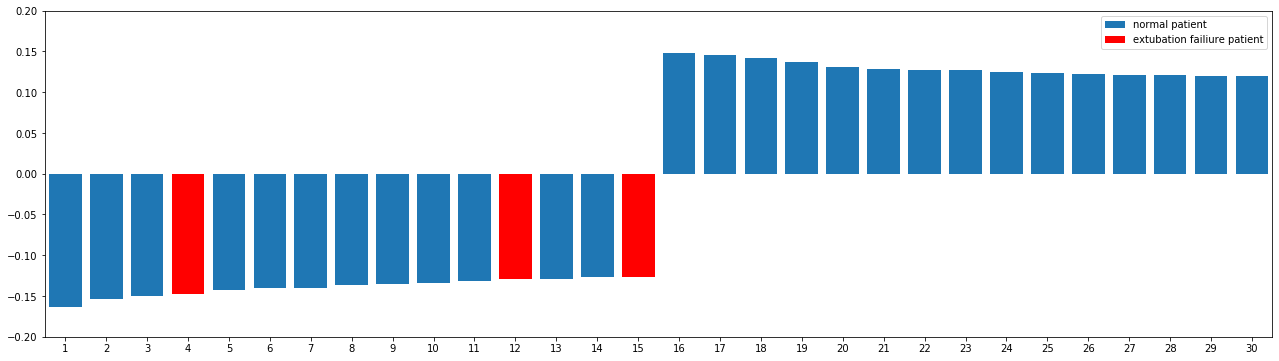

In [272]:
colors = {'normal patient':'C0', 'extubation failiure patient':'red'}  
c = data_df['Type'].apply(lambda x:colors[x])
plt.figure(figsize=(22,6))
ax = plt.gca() 
bars= ax.bar(data_df['object'], data_df['Value'], color=c)
plt.xlim(-0.5, len(points_to_plot)-0.5)
plt.ylim(-0.2, 0.2)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(data_df['object'], data_df['Value'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

ax.legend()
plt.show()

In [241]:
influences_modified.shape

(238208,)

In [242]:
new_points = influences_modified[175872:]

In [243]:
abovezero = []
for i in range(len(new_points)):
    if abs(new_points[i]) > 0.05:
        abovezero.append(new_points[i])
    

In [244]:
len(abovezero)

414

In [245]:
sort_order = np.argsort(abovezero)

In [246]:
abovezero_ordered=[]
for i in sort_order:
    abovezero_ordered.append(abovezero[i])

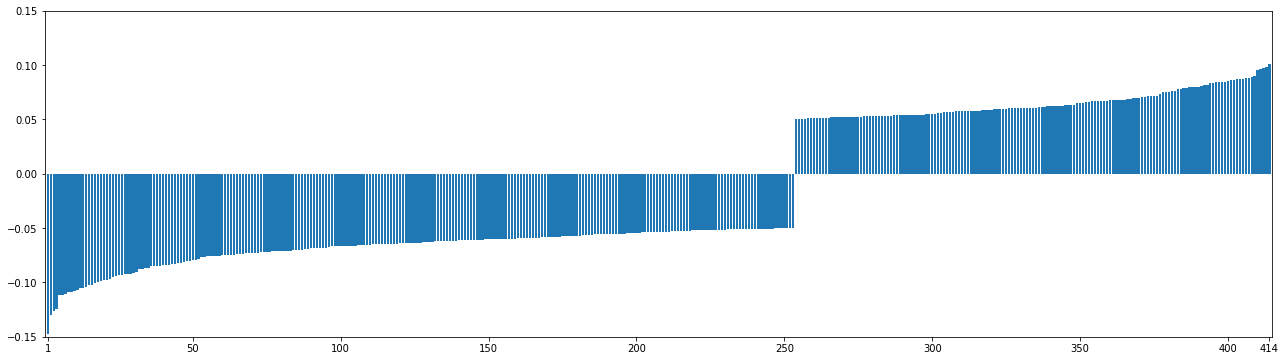

In [275]:
plt.figure(figsize=(22,6))
plt.ylim(-0.15, 0.15)
plt.xlim(0, len(abovezero)+1)
ax = plt.gca() 
ind = np.array(np.arange(len(abovezero_ordered)))
ax.bar(ind+1, abovezero_ordered)

plt.xticks([1,50,100,150,200,250,300,350,400,414], visible=True, rotation="horizontal")
plt.show()


In [102]:
orig_model_preds[114]

1

In [103]:
testy[114]

1.0

In [104]:
modified_model_preds[114]

0